In [1]:
from pynwb import NWBHDF5IO


# Open and read the file

io = NWBHDF5IO('/mnt/NAS/iEEG_EHR_converted/sub-259/ses-01/ieeg/sub-259_ses-01_run-IA6194BX.nwb', 'r')
nwbfile = io.read()


In [2]:
pip install -U pynwb

Note: you may need to restart the kernel to use updated packages.


In [2]:
electrode_table = nwbfile.electrodes.to_dataframe()

In [19]:
series = nwbfile.acquisition['ElectricalSeries_sEEG']

# Check HDF5 properties
print("Data shape:", series.data.shape)
print("Data dtype:", series.data.dtype)
print("Chunk shape:", series.data.chunks)
print("Compression:", series.data.compression)
print("File size:", series.data.nbytes / 1e9, "GB")


io.close()

Data shape: (7200000, 230)
Data dtype: float64
Chunk shape: (10000, 230)
Compression: gzip
File size: 13.248 GB


In [23]:
nwbfile.get_electrode_group(name="sEEG")


sEEG pynwb.ecephys.ElectrodeGroup at 0x138391248042288
Fields:
  description: Stereotactic depth electrodes (sEEG)
  device: NihonKohden pynwb.device.Device at 0x138391262587056
Fields:
  description: Nihon Kohden EEG-1200A

  location: depth

File duration: 120.0 minutes
Loading middle segment: 57.5-62.5 min
Plotting 50 channels...


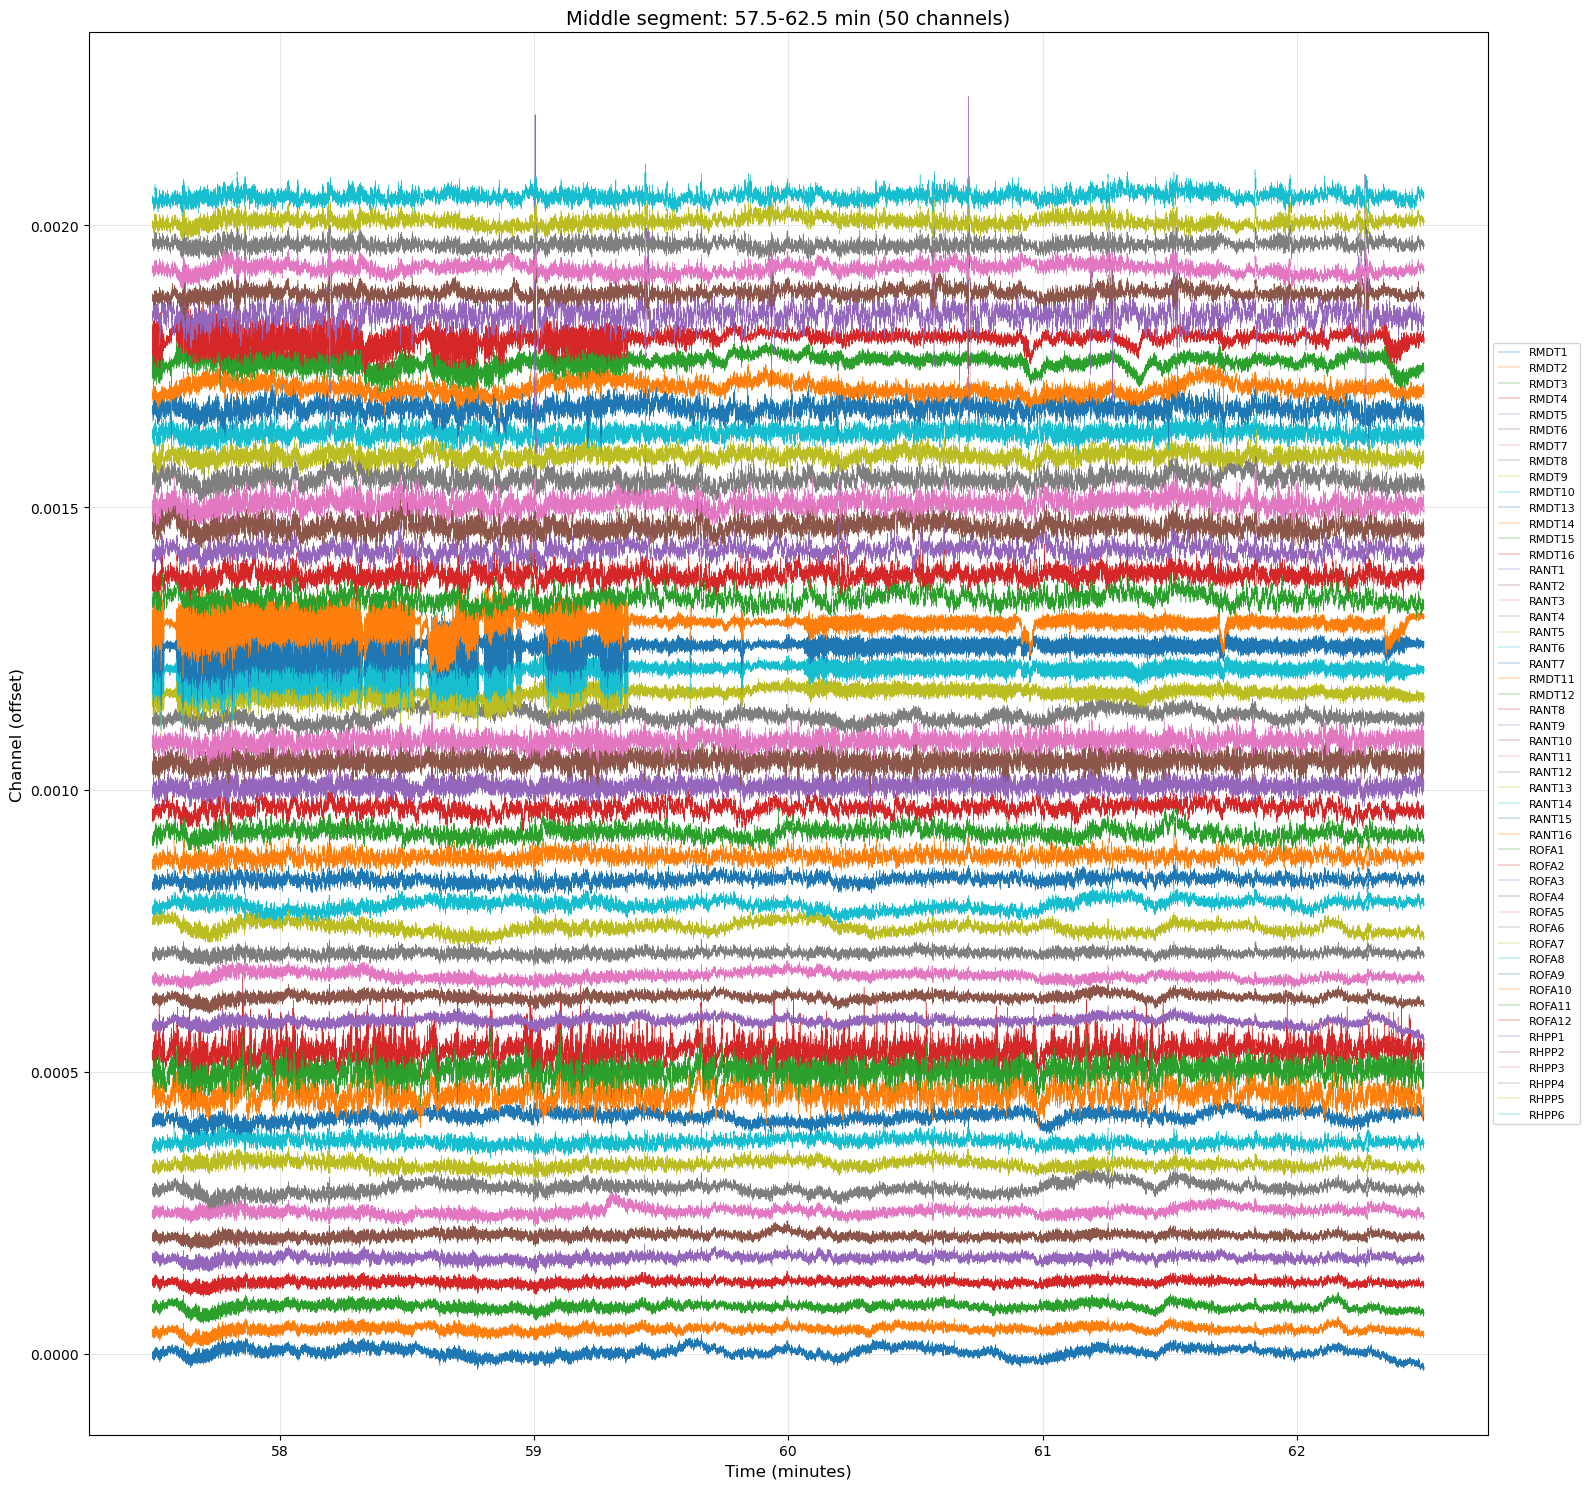

In [31]:
import pynwb
import numpy as np
import matplotlib.pyplot as plt

def plot_timeseries(nwb_path, series_name='ElectricalSeries_sEEG', 
                    duration_min=5, n_channels=None, segment='middle'):
    """
    Plot time series for multiple channels.
    
    Parameters
    ----------
    nwb_path : str
        Path to NWB file
    series_name : str
        Name of ElectricalSeries to plot
    duration_min : float
        Duration to plot in minutes
    n_channels : int or None
        Number of channels to plot (None = all channels)
    segment : str
        Which segment to plot: 'start', 'middle', 'end'
    """
    # Load NWB
    io = pynwb.NWBHDF5IO(nwb_path, 'r')
    nwb = io.read()
    series = nwb.acquisition[series_name]
    
    # Get basic info
    n_samples_total, n_channels_total = series.data.shape
    sfreq = series.rate
    duration_total = n_samples_total / sfreq / 60  # minutes
    
    # Get channel names
    elec_indices = series.electrodes.data[:]
    elec_df = nwb.electrodes.to_dataframe().iloc[elec_indices]
    channel_names = elec_df['location'].tolist()
    
    # Determine how much data to load
    time_samples = int(duration_min * 60 * sfreq)
    time_samples = min(time_samples, n_samples_total)
    
    # Determine start index based on segment
    if segment == 'start':
        start_idx = 0
    elif segment == 'middle':
        start_idx = (n_samples_total - time_samples) // 2
    elif segment == 'end':
        start_idx = n_samples_total - time_samples
    else:
        raise ValueError("segment must be 'start', 'middle', or 'end'")
    
    end_idx = start_idx + time_samples
    start_time_min = start_idx / sfreq / 60
    
    if n_channels is None:
        n_channels = n_channels_total
    else:
        n_channels = min(n_channels, n_channels_total)
    
    print(f"File duration: {duration_total:.1f} minutes")
    print(f"Loading {segment} segment: {start_time_min:.1f}-{start_time_min + duration_min:.1f} min")
    print(f"Plotting {n_channels} channels...")
    
    # Load data chunk
    data_chunk = series.data[start_idx:end_idx, :n_channels]
    time = (np.arange(time_samples) + start_idx) / sfreq / 60  # Absolute time in minutes
    
    # Create stacked plot
    fig, ax = plt.subplots(1, 1, figsize=(16, max(8, n_channels * 0.3)))
    
    offset = 0
    spacing = np.std(data_chunk) * 4  # Space traces by 4 standard deviations
    
    for i in range(n_channels):
        ax.plot(time, data_chunk[:, i] + offset, linewidth=0.3, 
                label=channel_names[i])
        offset += spacing
    
    ax.set_xlabel('Time (minutes)', fontsize=12)
    ax.set_ylabel('Channel (offset)', fontsize=12)
    ax.set_title(f'{segment.capitalize()} segment: {start_time_min:.1f}-{start_time_min + duration_min:.1f} min ({n_channels} channels)', 
                 fontsize=14)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    io.close()

# Usage:

# Middle 5 minutes of all channels
plot_timeseries('/mnt/NAS/iEEG_EHR_converted/sub-259/ses-01/ieeg/sub-259_ses-01_run-IA6194BX.nwb', 
                'ElectricalSeries_sEEG', 
                duration_min=5,
                segment='middle', n_channels=50)

# Or specify 'start' or 'end'
# plot_timeseries('your_file.nwb', 'ElectricalSeries_sEEG', duration_min=5, segment='end')

In [37]:
elec_df = nwbfile.electrodes.to_dataframe()

In [40]:
elec_df.columns.to_list


<bound method IndexOpsMixin.tolist of Index(['location', 'group', 'group_name', 'chan_num', 'FS_label', 'FS_vol',
       'FS_ind', 'WMvsGM', 'LvsR', 'sEEG_ECoG', 'Desikan_Killiany', 'DK_ind',
       'DK_lobe', 'Destrieux', 'Destr_ind', 'Destr_long', 'Yeo7', 'Yeo7_ind',
       'Yeo17', 'Yeo17_ind', 'PTD_ind', 'surr_GM_vox', 'surr_WM_vox',
       'LEPTO_coord_1', 'LEPTO_coord_2', 'LEPTO_coord_3', 'MNI_coord_1',
       'MNI_coord_2', 'MNI_coord_3', 'MGRID_coord_1', 'MGRID_coord_2',
       'MGRID_coord_3', 'subINF_coord_1', 'subINF_coord_2', 'subINF_coord_3',
       'fsaverageINF_coord_1', 'fsaverageINF_coord_2', 'fsaverageINF_coord_3',
       'ScannerNativeRAS_coord_1', 'ScannerNativeRAS_coord_2',
       'ScannerNativeRAS_coord_3', 'JP_label_original', 'JP_label_std',
       'std_label_keller'],
      dtype='str')>

In [11]:
import pynwb
import mne
import numpy as np

def load_nwb_series_to_mne(nwb_path, series_name, ch_type):
    """
    Load an ElectricalSeries from NWB file into MNE Raw object.
    
    Parameters
    ----------
    nwb_path : str
        Path to NWB file
    series_name : str
        Name of ElectricalSeries in acquisition (e.g., 'ElectricalSeries_sEEG')
    ch_type : str
        MNE channel type ('seeg', 'ekg', 'eeg', etc.)
    
    Returns
    -------
    raw : mne.io.RawArray
        MNE Raw object with data
    """
    # Load NWB file
    io = pynwb.NWBHDF5IO(nwb_path, 'r')
    nwb = io.read()
    
    # Get the series
    series = nwb.acquisition[series_name]
    
    # Extract data and metadata
    data = series.data[:]  # shape: (n_samples, n_channels)
    sfreq = series.rate
    data = data.T  # Transpose to MNE format (n_channels, n_samples)
    
    # Get electrode information
    elec_indices = series.electrodes.data[:]
    elec_df = nwb.electrodes.to_dataframe().iloc[elec_indices]
    channel_names = elec_df['location'].tolist()
    
    # Create MNE info structure
    info = mne.create_info(
        ch_names=channel_names,
        sfreq=sfreq,
        ch_types=ch_type
    )
    
    # Create Raw object
    raw = mne.io.RawArray(data, info)
    
    io.close()
    
    return raw

# Usage
nwb_path = '/mnt/NAS/iEEG_EHR_nwb/sub-259/ses-01/ieeg/sub-259_ses-01_run-IA6194BX.nwb'

# Load sEEG data
raw_seeg = load_nwb_series_to_mne(nwb_path, 'ElectricalSeries_sEEG', 'seeg')

# Load EKG data
# Verify
print(f"sEEG: {raw_seeg.info['nchan']} channels, {raw_seeg.n_times} samples, {raw_seeg.info['sfreq']} Hz")

Creating RawArray with float64 data, n_channels=230, n_times=7200000
    Range : 0 ... 7199999 =      0.000 ...  7199.999 secs
Ready.
sEEG: 230 channels, 7200000 samples, 1000.0 Hz


In [12]:
raw_seeg.ch_names

['RMDT1',
 'RMDT2',
 'RMDT3',
 'RMDT4',
 'RMDT5',
 'RMDT6',
 'RMDT7',
 'RMDT8',
 'RMDT9',
 'RMDT10',
 'RMDT13',
 'RMDT14',
 'RMDT15',
 'RMDT16',
 'RANT1',
 'RANT2',
 'RANT3',
 'RANT4',
 'RANT5',
 'RANT6',
 'RANT7',
 'RMDT11',
 'RMDT12',
 'RANT8',
 'RANT9',
 'RANT10',
 'RANT11',
 'RANT12',
 'RANT13',
 'RANT14',
 'RANT15',
 'RANT16',
 'ROFA1',
 'ROFA2',
 'ROFA3',
 'ROFA4',
 'ROFA5',
 'ROFA6',
 'ROFA7',
 'ROFA8',
 'ROFA9',
 'ROFA10',
 'ROFA11',
 'ROFA12',
 'RHPP1',
 'RHPP2',
 'RHPP3',
 'RHPP4',
 'RHPP5',
 'RHPP6',
 'RHPP7',
 'RHPP8',
 'RHPP9',
 'RHPP10',
 'RHPP11',
 'RHPP12',
 'RINS1',
 'RINS2',
 'RINS3',
 'RINS4',
 'RINS5',
 'RINS6',
 'RINS7',
 'RINS8',
 'RINS9',
 'RINS10',
 'RINS11',
 'RINS12',
 'RINS13',
 'RINS14',
 'RINS15',
 'RINS16',
 'RPCN1',
 'RPCN2',
 'RPCN3',
 'RPCN4',
 'RPCN5',
 'RPCN6',
 'RPCN7',
 'RPCN8',
 'RPCN9',
 'RPCN10',
 'RPCN11',
 'RPCN12',
 'RPCN13',
 'RPCN14',
 'RPCN15',
 'RPCN16',
 'RHPA1',
 'RHPA2',
 'RHPA3',
 'RHPA4',
 'RHPA5',
 'RHPA6',
 'RHPA7',
 'RHPA8',
 'RHPA

In [8]:
import pynwb
import numpy as np
import time
import re

# Configuration
nwb_path = '/mnt/NAS/iEEG_EHR_converted/sub-259/ses-01/ieeg/sub-259_ses-01_run-IA6194BX.nwb'
series_name = 'ElectricalSeries_sEEG'

print(f"Loading NWB file: {nwb_path}")

# Load NWB
start_load = time.time()
io = pynwb.NWBHDF5IO(nwb_path, 'r')
nwb = io.read()
series = nwb.acquisition[series_name]

# Get basic info
n_samples, n_channels = series.data.shape
sfreq = series.rate

print(f"File info: {n_samples} samples, {n_channels} channels, {sfreq} Hz")

# Get electrode metadata
elec_indices = series.electrodes.data[:]
elec_df = nwb.electrodes.to_dataframe().iloc[elec_indices]

print(f"Electrode table: {len(elec_df)} electrodes")
print(f"Columns: {elec_df.columns.tolist()}")

# Filter out excluded electrodes if column exists
if 'std_label_keller' in elec_df.columns:
    valid_mask = elec_df['std_label_keller'] != 'EXCLUDE'
    excluded_count = (~valid_mask).sum()
    print(f"Excluding {excluded_count} electrodes marked as EXCLUDE")
    valid_elec_df = elec_df[valid_mask].copy()
else:
    print("No std_label_keller column, using all electrodes")
    valid_elec_df = elec_df.copy()

# Load all data
print("\nLoading data...")
data = series.data[:]
load_time = time.time() - start_load
print(f"  Load time: {load_time:.1f} seconds ({load_time/60:.1f} minutes)")



Loading NWB file: /mnt/NAS/iEEG_EHR_converted/sub-259/ses-01/ieeg/sub-259_ses-01_run-IA6194BX.nwb
File info: 7200000 samples, 230 channels, 1000.0 Hz
Electrode table: 230 electrodes
Columns: ['location', 'group', 'group_name', 'chan_num', 'FS_label', 'FS_vol', 'FS_ind', 'WMvsGM', 'LvsR', 'sEEG_ECoG', 'Desikan_Killiany', 'DK_ind', 'DK_lobe', 'Destrieux', 'Destr_ind', 'Destr_long', 'Yeo7', 'Yeo7_ind', 'Yeo17', 'Yeo17_ind', 'PTD_ind', 'surr_GM_vox', 'surr_WM_vox', 'LEPTO_coord_1', 'LEPTO_coord_2', 'LEPTO_coord_3', 'MNI_coord_1', 'MNI_coord_2', 'MNI_coord_3', 'MGRID_coord_1', 'MGRID_coord_2', 'MGRID_coord_3', 'subINF_coord_1', 'subINF_coord_2', 'subINF_coord_3', 'fsaverageINF_coord_1', 'fsaverageINF_coord_2', 'fsaverageINF_coord_3', 'ScannerNativeRAS_coord_1', 'ScannerNativeRAS_coord_2', 'ScannerNativeRAS_coord_3', 'JP_label_original', 'JP_label_std', 'std_label_keller']
Excluding 71 electrodes marked as EXCLUDE

Loading data...
  Load time: 149.7 seconds (2.5 minutes)


In [14]:
import time

# Filter out "out of brain" electrodes
print("Checking for 'out of brain' electrodes...")

# Check multiple columns that might contain anatomical info
location_columns = ['location', 'FS_label', 'Desikan_Killiany', 'Destrieux', 'JP_label_original', 'JP_label_std']
out_of_brain_mask = pd.Series([False] * len(elec_df), index=elec_df.index)

for col in location_columns:
    if col in elec_df.columns:
        # Case-insensitive check for "out of brain"
        out_of_brain_mask |= elec_df[col].astype(str).str.contains('out of brain', case=False, na=False)

out_of_brain_count = out_of_brain_mask.sum()
print(f"Found {out_of_brain_count} electrodes marked as 'out of brain'")

if out_of_brain_count > 0:
    print(f"Out of brain electrodes: {elec_df[out_of_brain_mask]['location'].tolist()}")

# Create valid electrode dataframe (excluding out of brain)
valid_elec_df = elec_df[~out_of_brain_mask].copy()
print(f"Using {len(valid_elec_df)}/{len(elec_df)} electrodes for re-referencing")

# Parse electrode labels to identify shafts
def parse_electrode_shaft(location):
    """Extract shaft name and contact number from location (e.g., 'RMDT1')"""
    match = re.match(r'^([A-Za-z]+)(\d+)$', location)
    if match:
        shaft = match.group(1)
        number = int(match.group(2))
        return shaft, number
    else:
        return None, None

valid_elec_df['shaft'] = None
valid_elec_df['contact_num'] = None

for idx, row in valid_elec_df.iterrows():
    shaft, num = parse_electrode_shaft(row['location'])
    valid_elec_df.at[idx, 'shaft'] = shaft
    valid_elec_df.at[idx, 'contact_num'] = num

# Remove electrodes with unparseable labels
parseable_mask = valid_elec_df['shaft'].notna()
unparseable_count = (~parseable_mask).sum()
if unparseable_count > 0:
    print(f"Warning: {unparseable_count} electrodes have unparseable locations")
    print(f"  Unparseable: {valid_elec_df[~parseable_mask]['location'].tolist()}")
    valid_elec_df = valid_elec_df[parseable_mask].copy()

# Create bipolar pairs
pairs = []
grouped = valid_elec_df.groupby('shaft')

print(f"\nIdentifying bipolar pairs across {len(grouped)} shafts...")

for shaft_name, shaft_df in grouped:
    # Sort by contact number
    shaft_df = shaft_df.sort_values('contact_num')
    
    # Convert to list of (index, row) tuples
    contacts = [(idx, row) for idx, row in shaft_df.iterrows()]
    
    # Create adjacent pairs
    for i in range(len(contacts) - 1):
        anode_idx, anode = contacts[i]
        cathode_idx, cathode = contacts[i + 1]
        
        # Check that contacts are consecutive
        if cathode['contact_num'] - anode['contact_num'] == 1:
            pair = {
                'anode_idx': anode_idx,  # This is the original dataframe index
                'cathode_idx': cathode_idx,
                'anode_location': anode['location'],
                'cathode_location': cathode['location'],
                'location': f"{anode['location']}-{cathode['location']}",
                'shaft': shaft_name
            }
            pairs.append(pair)
        else:
            print(f"  Skipping non-consecutive: {shaft_name} {anode['location']}-{cathode['location']}")

print(f"\nCreated {len(pairs)} bipolar pairs")

# Compute bipolar re-referencing for ALL valid pairs
print(f"\nComputing bipolar montage for all {len(pairs)} pairs...")

start_compute = time.time()
n_pairs = len(pairs)
bipolar_data = np.zeros((n_samples, n_pairs), dtype=data.dtype)

for i, pair in enumerate(pairs):
    # Find column indices in original data array
    anode_col = np.where(elec_indices == pair['anode_idx'])[0][0]
    cathode_col = np.where(elec_indices == pair['cathode_idx'])[0][0]
    
    # Bipolar: anode - cathode
    bipolar_data[:, i] = data[:, anode_col] - data[:, cathode_col]

compute_time = time.time() - start_compute
print(f"  Compute time: {compute_time:.3f} seconds")

# Verify data looks reasonable


print(f"\nTotal compute time: {compute_time:.3f} seconds")

print("\nVariables available:")
print("  bipolar_data - bipolar referenced data (n_samples, n_pairs)")
print("  pairs - list of dicts with pair info")
print("  valid_elec_df - filtered electrode table (no 'out of brain')")

Checking for 'out of brain' electrodes...
Found 16 electrodes marked as 'out of brain'
Out of brain electrodes: ['RMDT13', 'RANT14', 'RANT15', 'RANT16', 'ROFA12', 'RHPP3', 'RHPP4', 'RHPP12', 'RHPA1', 'RHPA2', 'RPLV13', 'RPLV14', 'LANT14', 'LPLV14', 'LINS16', 'LHPA16']
Using 214/230 electrodes for re-referencing

Identifying bipolar pairs across 16 shafts...
  Skipping non-consecutive: RHPP RHPP2-RHPP5
  Skipping non-consecutive: RMDT RMDT12-RMDT14

Created 196 bipolar pairs

Computing bipolar montage for all 196 pairs...
  Compute time: 202.311 seconds

Bipolar data stats:
  Shape: (7200000, 196)
  Mean: 4.095681e-07 V
  Std: 1.347708e-04 V
  Min: -6.399902e-03 V
  Max: 6.399902e-03 V

Total compute time: 202.311 seconds

Variables available:
  bipolar_data - bipolar referenced data (n_samples, n_pairs)
  pairs - list of dicts with pair info
  valid_elec_df - filtered electrode table (no 'out of brain')


Extracting EDF parameters from /mnt/NAS/sisler/test_compression_comparison/edf_format/sub-234/ses-01/ieeg/sub-234_ses-01_run-FA6151E9.edf...
Setting channel info structure...
Creating raw.info structure...


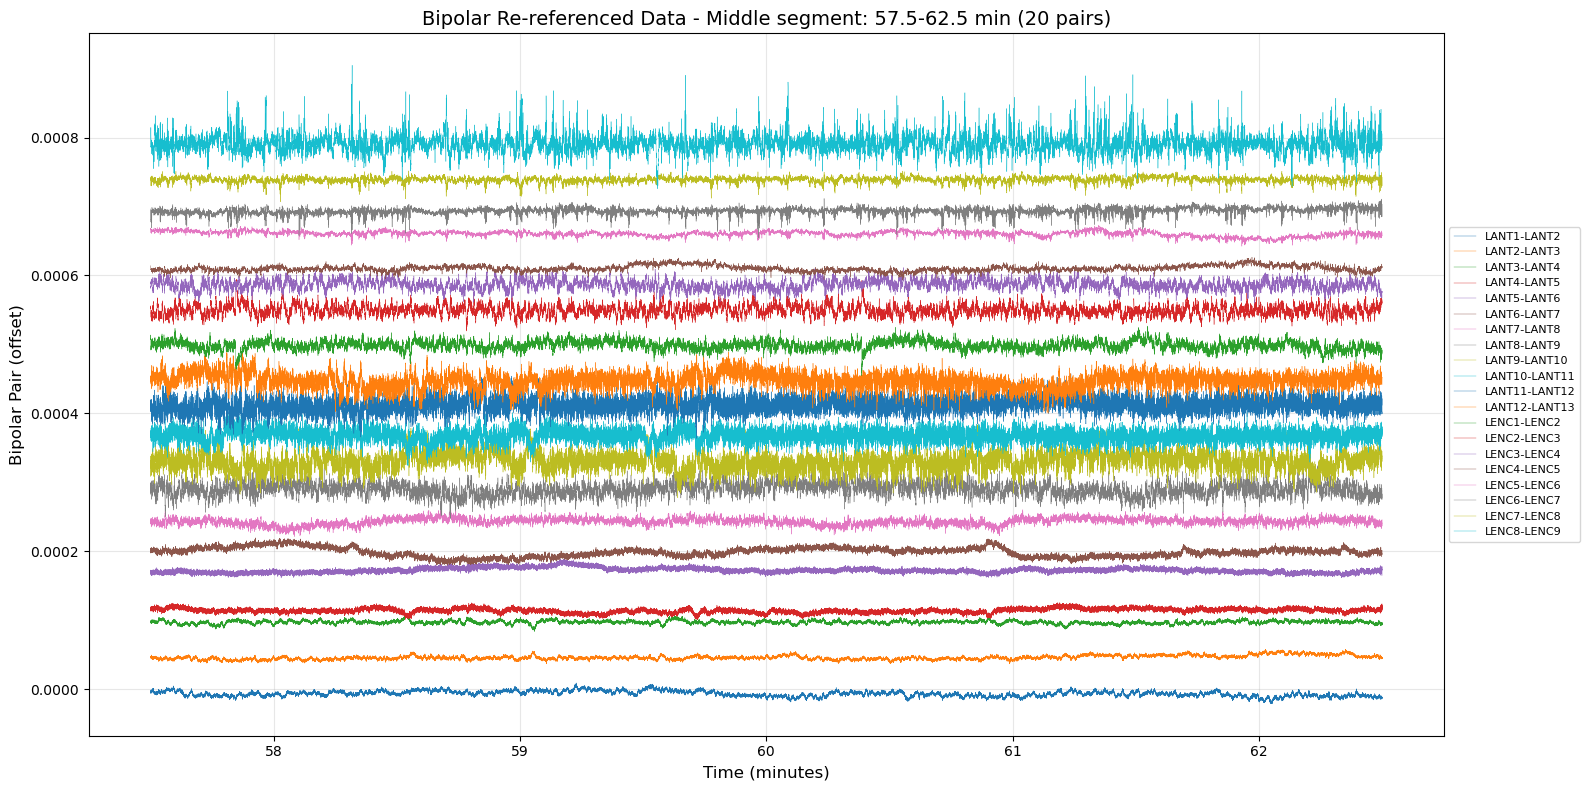

Plotted 20 bipolar pairs
First few pairs: ['LANT1-LANT2', 'LANT2-LANT3', 'LANT3-LANT4', 'LANT4-LANT5', 'LANT5-LANT6']


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration
duration_min = 5
n_pairs_to_plot = 20  # Number of bipolar pairs to plot

# Extract middle segment
time_samples = int(duration_min * 60 * sfreq)
start_idx = (n_samples - time_samples) // 2
end_idx = start_idx + time_samples

# Get bipolar data chunk
n_pairs_available = bipolar_data.shape[1]
n_pairs_to_plot = min(n_pairs_to_plot, n_pairs_available)

bipolar_chunk = bipolar_data[start_idx:end_idx, :n_pairs_to_plot]
time = (np.arange(time_samples) + start_idx) / sfreq / 60  # Time in minutes

# Get pair labels
pair_labels = [pairs[i]['location'] for i in range(n_pairs_to_plot)]

# Create stacked plot
fig, ax = plt.subplots(1, 1, figsize=(16, max(8, n_pairs_to_plot * 0.3)))

offset = 0
spacing = np.std(bipolar_chunk) * 4

for i in range(n_pairs_to_plot):
    ax.plot(time, bipolar_chunk[:, i] + offset, linewidth=0.3, 
            label=pair_labels[i])
    offset += spacing

start_time_min = start_idx / sfreq / 60
ax.set_xlabel('Time (minutes)', fontsize=12)
ax.set_ylabel('Bipolar Pair (offset)', fontsize=12)
ax.set_title(f'Bipolar Re-referenced Data - Middle segment: {start_time_min:.1f}-{start_time_min + duration_min:.1f} min ({n_pairs_to_plot} pairs)', 
             fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Plotted {n_pairs_to_plot} bipolar pairs")
print(f"First few pairs: {pair_labels[:5]}")

Raw data range:
  Min: -7.197265e-05 V
  Max: 6.943359e-05 V
  Range: 1.414062e-04 V

Bipolar data range:
  Min: -5.507812e-05 V
  Max: 5.312500e-05 V
  Range: 1.082031e-04 V


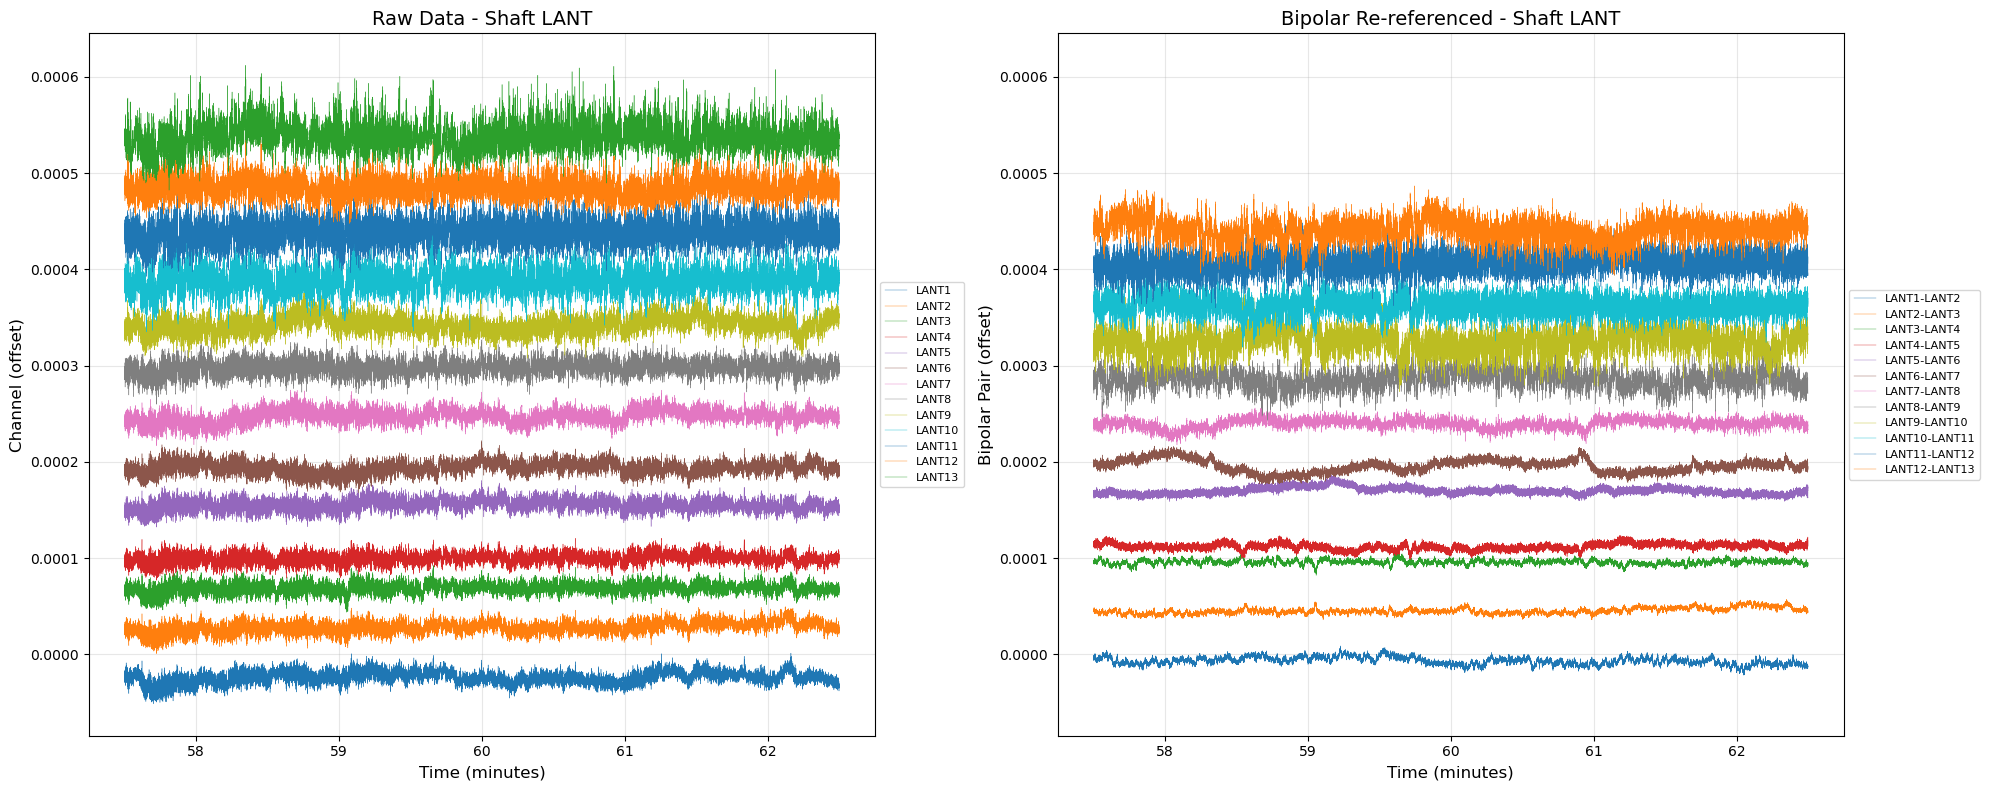


Y-axis limits set to: (np.float64(-8.443933169020743e-05), np.float64(0.0006452963385774411))


In [17]:
# Check the actual ranges
print("Raw data range:")
print(f"  Min: {raw_chunk.min():.6e} V")
print(f"  Max: {raw_chunk.max():.6e} V")
print(f"  Range: {raw_chunk.max() - raw_chunk.min():.6e} V")

print("\nBipolar data range:")
print(f"  Min: {bipolar_chunk_shaft.min():.6e} V")
print(f"  Max: {bipolar_chunk_shaft.max():.6e} V")
print(f"  Range: {bipolar_chunk_shaft.max() - bipolar_chunk_shaft.min():.6e} V")

# Create comparison plot with SAME Y-AXIS SCALE
fig, axes = plt.subplots(1, 2, figsize=(20, max(8, len(shaft_elec_indices) * 0.3)))

# Determine common y-axis limits
raw_range = raw_chunk.max() - raw_chunk.min()
bipolar_range = bipolar_chunk_shaft.max() - bipolar_chunk_shaft.min()
max_range = max(raw_range, bipolar_range)

# Left: Raw data
ax = axes[0]
offset = 0
spacing = np.std(raw_chunk) * 4
for i in range(len(shaft_elec_indices)):
    ax.plot(time, raw_chunk[:, i] + offset, linewidth=0.3, 
            label=shaft_elec_locations[i])
    offset += spacing
ax.set_xlabel('Time (minutes)', fontsize=12)
ax.set_ylabel('Channel (offset)', fontsize=12)
ax.set_title(f'Raw Data - Shaft {shaft_to_compare}', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
ax.grid(True, alpha=0.3)
ylim_raw = ax.get_ylim()

# Right: Bipolar data
ax = axes[1]
offset = 0
spacing = np.std(bipolar_chunk_shaft) * 4
for i in range(len(bipolar_indices)):
    ax.plot(time, bipolar_chunk_shaft[:, i] + offset, linewidth=0.3,
            label=bipolar_labels_shaft[i])
    offset += spacing
ax.set_xlabel('Time (minutes)', fontsize=12)
ax.set_ylabel('Bipolar Pair (offset)', fontsize=12)
ax.set_title(f'Bipolar Re-referenced - Shaft {shaft_to_compare}', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
ax.grid(True, alpha=0.3)
ylim_bipolar = ax.get_ylim()

# Set same y-limits
common_ylim = (min(ylim_raw[0], ylim_bipolar[0]), max(ylim_raw[1], ylim_bipolar[1]))
axes[0].set_ylim(common_ylim)
axes[1].set_ylim(common_ylim)

plt.tight_layout()
plt.show()

print(f"\nY-axis limits set to: {common_ylim}")

In [18]:
# Compare voltage magnitudes between raw and bipolar
print("=" * 60)
print("VOLTAGE MAGNITUDE COMPARISON")
print("=" * 60)

print("\nRaw data (Shaft LANT):")
print(f"  Min: {raw_chunk.min():.6e} V = {raw_chunk.min() * 1e6:.2f} µV")
print(f"  Max: {raw_chunk.max():.6e} V = {raw_chunk.max() * 1e6:.2f} µV")
print(f"  Mean: {raw_chunk.mean():.6e} V = {raw_chunk.mean() * 1e6:.2f} µV")
print(f"  Std: {raw_chunk.std():.6e} V = {raw_chunk.std() * 1e6:.2f} µV")
print(f"  Peak-to-peak range: {(raw_chunk.max() - raw_chunk.min()):.6e} V = {(raw_chunk.max() - raw_chunk.min()) * 1e6:.2f} µV")

print("\nBipolar data (Shaft LANT):")
print(f"  Min: {bipolar_chunk_shaft.min():.6e} V = {bipolar_chunk_shaft.min() * 1e6:.2f} µV")
print(f"  Max: {bipolar_chunk_shaft.max():.6e} V = {bipolar_chunk_shaft.max() * 1e6:.2f} µV")
print(f"  Mean: {bipolar_chunk_shaft.mean():.6e} V = {bipolar_chunk_shaft.mean() * 1e6:.2f} µV")
print(f"  Std: {bipolar_chunk_shaft.std():.6e} V = {bipolar_chunk_shaft.std() * 1e6:.2f} µV")
print(f"  Peak-to-peak range: {(bipolar_chunk_shaft.max() - bipolar_chunk_shaft.min()):.6e} V = {(bipolar_chunk_shaft.max() - bipolar_chunk_shaft.min()) * 1e6:.2f} µV")

print("\nRatio (Bipolar / Raw):")
print(f"  Std ratio: {bipolar_chunk_shaft.std() / raw_chunk.std():.3f}x")
print(f"  Range ratio: {(bipolar_chunk_shaft.max() - bipolar_chunk_shaft.min()) / (raw_chunk.max() - raw_chunk.min()):.3f}x")

# Also check per-channel statistics
print("\n" + "=" * 60)
print("PER-CHANNEL STATISTICS")
print("=" * 60)

print("\nRaw channels (std dev in µV):")
for i in range(len(shaft_elec_indices)):
    print(f"  {shaft_elec_locations[i]:10s}: {raw_chunk[:, i].std() * 1e6:7.2f} µV")

print("\nBipolar pairs (std dev in µV):")
for i in range(len(bipolar_indices)):
    print(f"  {bipolar_labels_shaft[i]:20s}: {bipolar_chunk_shaft[:, i].std() * 1e6:7.2f} µV")

VOLTAGE MAGNITUDE COMPARISON

Raw data (Shaft LANT):
  Min: -7.197265e-05 V = -71.97 µV
  Max: 6.943359e-05 V = 69.43 µV
  Mean: -2.066066e-05 V = -20.66 µV
  Std: 1.130610e-05 V = 11.31 µV
  Peak-to-peak range: 1.414062e-04 V = 141.41 µV

Bipolar data (Shaft LANT):
  Min: -5.507812e-05 V = -55.08 µV
  Max: 5.312500e-05 V = 53.12 µV
  Mean: -1.565938e-06 V = -1.57 µV
  Std: 1.020312e-05 V = 10.20 µV
  Peak-to-peak range: 1.082031e-04 V = 108.20 µV

Ratio (Bipolar / Raw):
  Std ratio: 0.902x
  Range ratio: 0.765x

PER-CHANNEL STATISTICS

Raw channels (std dev in µV):
  LANT1     :    5.85 µV
  LANT2     :    5.42 µV
  LANT3     :    4.78 µV
  LANT4     :    4.72 µV
  LANT5     :    5.29 µV
  LANT6     :    5.83 µV
  LANT7     :    6.54 µV
  LANT8     :    6.91 µV
  LANT9     :    8.44 µV
  LANT10    :   11.65 µV
  LANT11    :   11.35 µV
  LANT12    :    9.54 µV
  LANT13    :   13.31 µV

Bipolar pairs (std dev in µV):
  LANT1-LANT2         :    3.99 µV
  LANT2-LANT3         :    3.10 µV


Found 16 excluded channels
Plotting 16 excluded channels
Excluded channel labels: ['RMDT13', 'RANT14', 'RANT15', 'RANT16', 'ROFA12', 'RHPP3', 'RHPP4', 'RHPP12', 'RHPA1', 'RHPA2', 'RPLV13', 'RPLV14', 'LANT14', 'LPLV14', 'LINS16', 'LHPA16']


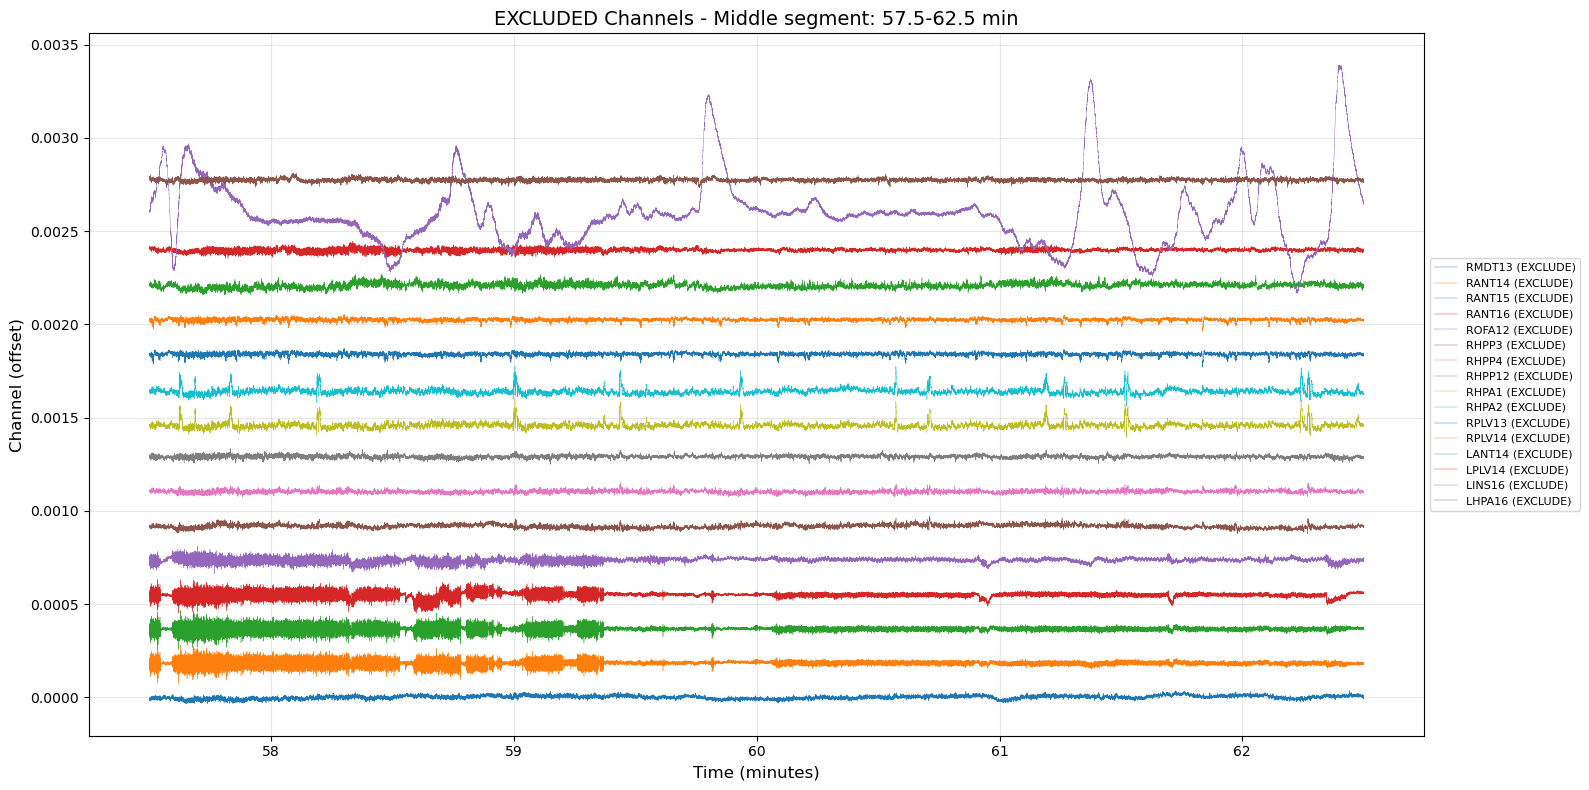


Excluded channels data stats:
  Mean: -1.870853e-06 V
  Std: 4.609277e-05 V
  Min: -4.144531e-04 V
  Max: 8.078125e-04 V


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for excluded channels
if 'std_label_keller' in elec_df.columns:
    excluded_mask = elec_df['JP_label_original'] == 'Out of Brain'
    excluded_elec_df = elec_df[excluded_mask].copy()
    print(f"Found {len(excluded_elec_df)} excluded channels")
else:
    print("No std_label_keller column found")
    excluded_elec_df = None

if excluded_elec_df is not None and len(excluded_elec_df) > 0:
    # Get up to 20 excluded channels
    n_excluded_to_plot = min(20, len(excluded_elec_df))
    excluded_subset = excluded_elec_df.head(n_excluded_to_plot)
    
    # Get their indices in the original data array
    excluded_data_indices = []
    for idx in excluded_subset.index:
        # Find where this electrode index appears in elec_indices
        data_col = np.where(elec_indices == idx)[0]
        if len(data_col) > 0:
            excluded_data_indices.append(data_col[0])
    
    print(f"Plotting {len(excluded_data_indices)} excluded channels")
    print(f"Excluded channel labels: {excluded_subset['location'].tolist()}")
    
    # Extract 5 minutes of data from middle of file
    duration_min = 5
    time_samples = int(duration_min * 60 * sfreq)
    start_idx = (n_samples - time_samples) // 2
    end_idx = start_idx + time_samples
    
    # Get data for excluded channels
    excluded_data_chunk = data[start_idx:end_idx, excluded_data_indices]
    time = (np.arange(time_samples) + start_idx) / sfreq / 60  # Time in minutes
    
    # Create stacked plot
    fig, ax = plt.subplots(1, 1, figsize=(16, max(8, len(excluded_data_indices) * 0.3)))
    
    offset = 0
    spacing = np.std(excluded_data_chunk) * 4
    
    for i, (data_idx, (elec_idx, row)) in enumerate(zip(excluded_data_indices, excluded_subset.iterrows())):
        ax.plot(time, excluded_data_chunk[:, i] + offset, linewidth=0.3, 
                label=f"{row['location']} (EXCLUDE)")
        offset += spacing
    
    start_time_min = start_idx / sfreq / 60
    ax.set_xlabel('Time (minutes)', fontsize=12)
    ax.set_ylabel('Channel (offset)', fontsize=12)
    ax.set_title(f'EXCLUDED Channels - Middle segment: {start_time_min:.1f}-{start_time_min + duration_min:.1f} min', 
                 fontsize=14)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nExcluded channels data stats:")
    print(f"  Mean: {excluded_data_chunk.mean():.6e} V")
    print(f"  Std: {excluded_data_chunk.std():.6e} V")
    print(f"  Min: {excluded_data_chunk.min():.6e} V")
    print(f"  Max: {excluded_data_chunk.max():.6e} V")
else:
    print("No excluded channels to plot")

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal
import pynwb
from pynwb import NWBFile
from pynwb.ecephys import DecompositionSeries, ElectricalSeries
from datetime import datetime
import os

# Your frequency bands
bands = {
    'delta': (1.0, 4.0),
    'theta': (4.0, 8.0),
    'alpha': (8.0, 12.0),
    'beta': (15.0, 25.0),
    'gamma': (25.0, 70.0),
    'high_gamma': (70.0, 170.0)
}

def compute_time_varying_band_power(bipolar_data, sfreq, bands, window_sec=1.0, overlap_sec=0.5):
    """
    Compute time-varying band power using scipy spectrogram.
    """
    n_samples, n_channels = bipolar_data.shape
    
    nperseg = int(window_sec * sfreq)
    noverlap = int(overlap_sec * sfreq)
    
    # Compute spectrogram for first channel to get dimensions
    freqs, times, Sxx = signal.spectrogram(
        bipolar_data[:, 0],
        fs=sfreq,
        nperseg=nperseg,
        noverlap=noverlap,
        window='hann'
    )
    
    n_windows = len(times)
    n_bands = len(bands)
    band_power_time = np.zeros((n_windows, n_channels, n_bands))
    
    print(f"  Computing spectrogram: {n_windows} time windows, {len(freqs)} frequency bins")
    
    # Compute for all channels
    for ch_idx in range(n_channels):
        freqs, times, Sxx = signal.spectrogram(
            bipolar_data[:, ch_idx],
            fs=sfreq,
            nperseg=nperseg,
            noverlap=noverlap,
            window='hann'
        )
        
        # Extract power in each band
        for band_idx, (band_name, (fmin, fmax)) in enumerate(bands.items()):
            freq_mask = (freqs >= fmin) & (freqs < fmax)
            band_power_time[:, ch_idx, band_idx] = Sxx[freq_mask, :].mean(axis=0)
    
    return band_power_time, times

def create_bipolar_electrode_table(elec_df, pairs):
    """Create enhanced electrode table for bipolar pairs"""
    # (implementation above)
    coord_systems = ['MNI', 'LEPTO', 'MGRID', 'subINF', 'fsaverageINF', 'ScannerNativeRAS']
    coord_columns = []
    for coord_sys in coord_systems:
        for axis in ['_coord_1', '_coord_2', '_coord_3']:
            col_name = f"{coord_sys}{axis}"
            if col_name in elec_df.columns:
                coord_columns.append(col_name)
    
    single_columns = ['group', 'group_name']
    
    bipolar_rows = []
    
    for pair in pairs:
        anode_idx = pair['anode_idx']
        cathode_idx = pair['cathode_idx']
        
        anode_row = elec_df.loc[anode_idx]
        cathode_row = elec_df.loc[cathode_idx]
        
        new_row = {}
        new_row['location'] = pair['location']
        
        for col in single_columns:
            if col in elec_df.columns:
                new_row[col] = anode_row[col]
        
        for col in coord_columns:
            anode_val = anode_row[col]
            cathode_val = cathode_row[col]
            
            if pd.notna(anode_val) and pd.notna(cathode_val):
                new_row[col] = (anode_val + cathode_val) / 2
            elif pd.notna(anode_val):
                new_row[col] = anode_val
            elif pd.notna(cathode_val):
                new_row[col] = cathode_val
            else:
                new_row[col] = np.nan
        
        for col in elec_df.columns:
            if col not in single_columns and col not in coord_columns and col != 'location':
                new_row[f"{col}_anode"] = anode_row[col]
                new_row[f"{col}_cathode"] = cathode_row[col]
        
        bipolar_rows.append(new_row)
    
    return pd.DataFrame(bipolar_rows)

def process_raw_to_bipolar_psd(input_nwb_path, output_nwb_path, bands, 
                                window_sec=1.0, overlap_sec=0.5, overwrite=False):
    """
    Complete pipeline: Raw → Bipolar → PSD with enhanced electrode table.
    """
    if os.path.exists(output_nwb_path) and not overwrite:
        print(f"Skipping (already exists): {output_nwb_path}")
        return
    
    print(f"Processing: {input_nwb_path}")
    
    # Load raw NWB
    io_in = pynwb.NWBHDF5IO(input_nwb_path, 'r')
    nwb_in = io_in.read()
    
    # Get raw series
    series = nwb_in.acquisition['ElectricalSeries_sEEG']
    data = series.data[:]
    sfreq = series.rate
    
    print(f"  Raw data: {data.shape}, {sfreq} Hz")
    
    # Get electrode metadata
    elec_indices = series.electrodes.data[:]
    elec_df = nwb_in.electrodes.to_dataframe().iloc[elec_indices]
    
    # Filter out "out of brain" electrodes
    location_columns = ['location', 'FS_label', 'Desikan_Killiany', 'Destrieux', 
                       'JP_label_original', 'JP_label_std']
    out_of_brain_mask = pd.Series([False] * len(elec_df), index=elec_df.index)
    
    for col in location_columns:
        if col in elec_df.columns:
            out_of_brain_mask |= elec_df[col].astype(str).str.contains(
                'out of brain', case=False, na=False
            )
    
    valid_elec_df = elec_df[~out_of_brain_mask].copy()
    print(f"  Using {len(valid_elec_df)}/{len(elec_df)} electrodes (excluded {out_of_brain_mask.sum()} out-of-brain)")
    
    # Create bipolar pairs
    pairs, _ = create_bipolar_pairs(valid_elec_df)  # Your existing function
    print(f"  Created {len(pairs)} bipolar pairs")
    
    # Compute bipolar data
    print(f"  Computing bipolar montage...")
    bipolar_data = np.zeros((data.shape[0], len(pairs)), dtype=data.dtype)
    
    for i, pair in enumerate(pairs):
        anode_col = np.where(elec_indices == pair['anode_idx'])[0][0]
        cathode_col = np.where(elec_indices == pair['cathode_idx'])[0][0]
        bipolar_data[:, i] = data[:, anode_col] - data[:, cathode_col]
    
    # Compute time-varying band power
    print(f"  Computing band power...")
    band_power_time, times = compute_time_varying_band_power(
        bipolar_data, sfreq, bands, window_sec, overlap_sec
    )
    
    print(f"  Band power shape: {band_power_time.shape}")
    
    # Create enhanced bipolar electrode table
    print(f"  Creating enhanced electrode table...")
    bipolar_elec_df = create_bipolar_electrode_table(elec_df, pairs)
    
    print(f"  Bipolar electrode table: {len(bipolar_elec_df)} rows, {len(bipolar_elec_df.columns)} columns")
    
    # Create output NWB
    print(f"  Creating output NWB...")
    nwb_out = NWBFile(
        session_description=nwb_in.session_description + " - bipolar referenced, band power computed",
        identifier=nwb_in.identifier + "_bipolar_psd",
        session_start_time=nwb_in.session_start_time,
        timestamps_reference_time=nwb_in.timestamps_reference_time,
        file_create_date=datetime.now().astimezone(),
        experimenter=nwb_in.experimenter,
        lab=nwb_in.lab,
        institution=nwb_in.institution,
        subject=nwb_in.subject
    )
    
    # Create device and electrode group
    device = nwb_out.create_device(name='NihonKohden')
    elec_group = nwb_out.create_electrode_group(
        name='sEEG_bipolar',
        description='Bipolar referenced sEEG electrodes (anode-cathode pairs)',
        location='multiple',
        device=device
    )
    
    # Add electrodes with enhanced metadata
    for idx, row in bipolar_elec_df.iterrows():
        electrode_kwargs = {'group': elec_group}
        
        for col in bipolar_elec_df.columns:
            if col != 'group' and col != 'group_name':
                electrode_kwargs[col] = row[col]
        
        nwb_out.add_electrode(**electrode_kwargs)
    
    # Create electrode table region
    electrode_region = nwb_out.create_electrode_table_region(
        region=list(range(len(pairs))),
        description='bipolar electrode pairs'
    )
    
    # Create processing module
    ecephys_module = nwb_out.create_processing_module(
        name='ecephys',
        description='Processed electrophysiology data'
    )
    
    # Add DecompositionSeries
    sampling_rate = 1.0 / (times[1] - times[0])
    
    decomp_series = DecompositionSeries(
        name='band_power',
        description=f'Time-varying power in frequency bands (window={window_sec}s, overlap={overlap_sec}s). '
                    f'Source data was bipolar referenced (adjacent electrode pairs).',
        data=band_power_time,
        metric='power',
        unit='V^2/Hz',
        rate=sampling_rate,
        source_channels=electrode_region
    )
    
    for band_name, band_limits in bands.items():
        decomp_series.add_band(band_name=band_name, band_limits=band_limits)
    
    ecephys_module.add(decomp_series)
    
    # Write output
    print(f"  Writing: {output_nwb_path}")
    with pynwb.NWBHDF5IO(output_nwb_path, 'w') as io_out:
        io_out.write(nwb_out)
    
    io_in.close()
    
    file_size_mb = os.path.getsize(output_nwb_path) / (1024**2)
    print(f"  Done! Output size: {file_size_mb:.1f} MB")

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.
